In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [137]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


In [144]:
train=train.drop_duplicates()

In [145]:
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source


In [146]:
train[train.Price==11733]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
6337,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733,train
10663,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733,train


In [148]:
train.shape

(10463, 12)

In [4]:
test=pd.read_excel("Test_set.xlsx")

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [149]:
test[test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info,test
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included,test
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info,test
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info,test
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info,test
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info,test
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info,test
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info,test
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info,test
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included,test


In [6]:
train['source']='train'

In [7]:
test['source']='test'

In [150]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)

In [9]:
df.source.value_counts()

train    10683
test      2671
Name: source, dtype: int64

In [10]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354,10683.000000,13354
unique,12,44,5,6,132,223,1451,374,5,10,NaN,2
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN,train
freq,4746,633,5682,5682,3000,288,536,672,7056,10493,NaN,10683
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000,NaN


In [151]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [152]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
8893,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,train


In [153]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
8893,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,train


In [38]:
df[df['Total_Stops'].isnull()].Total_Stops='1 stop'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
df[df['Total_Stops'].isnull()].Total_Stops

9039    NaN
Name: Total_Stops, dtype: object

In [154]:
df.loc[8893,'Total_Stops']='1 stop'

In [155]:
df.loc[8893,'Route']='DEL → BOM → COK'

In [156]:
df.iloc[8893]

Airline                  Air India
Date_of_Journey          6/05/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → BOM → COK
Dep_Time                     09:45
Arrival_Time          09:25 07 May
Duration                   23h 40m
Total_Stops                 1 stop
Additional_Info            No info
Price                         7480
source                       train
Name: 8893, dtype: object

In [25]:
df_Route=df.query('Source == "Delhi" and Destination =="Cochin" and Price >7000.0 and  Price <8000.0')

In [33]:
df_Route['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [35]:
df_Route['Total_Stops'].mode()

0    1 stop
dtype: object

In [36]:
df_Route

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
27,GoAir,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5h 55m,1 stop,No info,7682.0,train
50,Jet Airways,9/03/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,In-flight meal not included,7202.0,train
63,IndiGo,15/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 16 May,10h 30m,1 stop,No info,7191.0,train
107,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → BOM → COK,04:45,19:15,14h 30m,1 stop,No info,7574.0,train
149,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,12:50,21:00,8h 10m,1 stop,No info,7005.0,train
191,Air India,27/03/2019,Delhi,Cochin,DEL → TRV → COK,05:15,06:50 28 Mar,25h 35m,1 stop,No info,7165.0,train
206,IndiGo,27/03/2019,Delhi,Cochin,DEL → BOM → COK,16:00,01:35 28 Mar,9h 35m,1 stop,No info,7048.0,train
213,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,7677.0,train
265,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,11:40,01:35 22 Mar,13h 55m,1 stop,No info,7695.0,train
285,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,17:30,01:30 28 May,8h,1 stop,In-flight meal not included,7308.0,train


In [157]:
df.shape

(13134, 12)

In [110]:
import pandas_profiling as pp

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [111]:
pp.ProfileReport(df_replace)

Number of variables,19
Number of observations,13354
Total Missing (%),1.1%
Total size in memory,1.9 MiB
Average record size in memory,152.0 B
Numeric,4
Categorical,14
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [13]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df.Price.max()

79512.0

In [43]:
df[df['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097.0,train
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,train
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,train
12485,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1 stop,Business class,NaN,test


In [158]:
df['Date_of_Journey_new'] = pd.to_datetime(df.Date_of_Journey)

In [159]:
df['Journey_quarter'] = df['Date_of_Journey_new'].dt.quarter

In [160]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1


In [161]:
df['Date_journey_day'] = df['Date_of_Journey_new'].dt.day

df[['Date_of_Journey_new', 'Date_journey_day']].head()

,Date_of_Journey_new,Date_journey_day
0,2019-03-24,24
1,2019-01-05,5
2,2019-09-06,6
3,2019-12-05,5
4,2019-01-03,3


In [162]:
df['Date_Journey_dayofweek'] = df['Date_of_Journey_new'].dt.dayofweek

df[['Date_of_Journey_new', 'Date_Journey_dayofweek']].head()

,Date_of_Journey_new,Date_Journey_dayofweek
0,2019-03-24,6
1,2019-01-05,5
2,2019-09-06,4
3,2019-12-05,3
4,2019-01-03,3


In [163]:
# day of the week - name

df['Date_Journey_dayweek'] = df['Date_of_Journey_new'].dt.weekday_name

df[['Date_of_Journey_new', 'Date_Journey_dayweek']].head()

,Date_of_Journey_new,Date_Journey_dayweek
0,2019-03-24,Sunday
1,2019-01-05,Saturday
2,2019-09-06,Friday
3,2019-12-05,Thursday
4,2019-01-03,Thursday


In [164]:

# was the application done on the weekend?

df['Date_Journey_is_weekend'] = np.where(df['Date_Journey_dayweek'].isin(['Sunday', 'Saturday']), 1,0)
df[['Date_of_Journey_new', 'Date_Journey_dayweek','Date_Journey_is_weekend']].head()

,Date_of_Journey_new,Date_Journey_dayweek,Date_Journey_is_weekend
0,2019-03-24,Sunday,1
1,2019-01-05,Saturday,1
2,2019-09-06,Friday,0
3,2019-12-05,Thursday,0
4,2019-01-03,Thursday,0


In [165]:
df['Date_Journey_year'] = df['Date_of_Journey_new'].dt.year

df[['Date_of_Journey_new', 'Date_Journey_year']].head()

,Date_of_Journey_new,Date_Journey_year
0,2019-03-24,2019
1,2019-01-05,2019
2,2019-09-06,2019
3,2019-12-05,2019
4,2019-01-03,2019


In [166]:
df.Date_Journey_year.value_counts()

2019    13134
Name: Date_Journey_year, dtype: int64

In [167]:
df.drop(columns=["Date_Journey_year"],inplace=True)

In [168]:
df.Journey_quarter.replace({1:"One",2:"Two",3:"Three",4:"Four"},inplace=True)

In [169]:
df.Total_Stops.value_counts()

1 stop      7057
non-stop    4324
2 stops     1697
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [69]:
df[df['Total_Stops']=='non-stop']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train,2019-06-24,2,24,0,Monday,0
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174.0,train,2019-04-18,2,18,3,Thursday,0
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667.0,train,2019-06-24,2,24,0,Monday,0
14,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804.0,train,2019-04-24,2,24,2,Wednesday,0
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943.0,train,2019-03-04,1,4,0,Monday,0
23,IndiGo,1/05/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823.0,train,2019-01-05,1,5,5,Saturday,1
28,Vistara,18/06/2019,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668.0,train,2019-06-18,2,18,1,Tuesday,0
29,Vistara,15/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-15,2,15,5,Saturday,1
30,Vistara,18/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-18,2,18,1,Tuesday,0


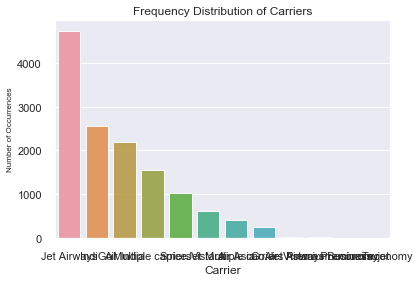

In [87]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['Airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Carrier', fontsize=12)
plt.show()

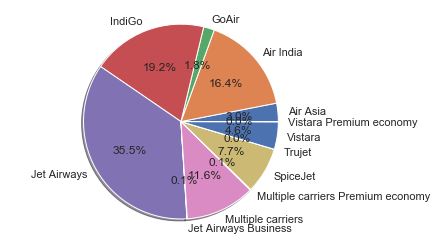

In [88]:
labels = df['Airline'].astype('category').cat.categories.tolist()
counts = df['Airline'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [24]:
replace_map = {'Airline': {'Jet Airways': 1, 'IndiGo': 2, 'Air India': 3, 'Multiple carriers': 4,'SpiceJet': 5, 'Vistara': 6, 'Air Asia': 7 , 'GoAir': 8 , 'Multiple carriers Premium economy': 9,'Jet Airways Business': 10,'Vistara Premium economy': 11,'Trujet': 12}}

In [25]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [26]:
labels = df['Airline'].astype('category').cat.categories.tolist()
replace_map_comp = {'Airline' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Airline': {'Air Asia': 1, 'Air India': 2, 'GoAir': 3, 'IndiGo': 4, 'Jet Airways': 5, 'Jet Airways Business': 6, 'Multiple carriers': 7, 'Multiple carriers Premium economy': 8, 'SpiceJet': 9, 'Trujet': 10, 'Vistara': 11, 'Vistara Premium economy': 12}}


In [170]:
df_replace = df.copy()

In [175]:
import re
ls=['^05:','^06:','^07:','^08:','^09:','^17:','^18:','^19:','^20:','^21:']
pattern=[]
for i in range(0,len(ls)):
    matcher = re.compile(ls[i])
    list_of_string = [s for s in df_replace['Dep_Time'] if matcher.match(s)]
    pattern +=list_of_string
    
df_replace['DEPPeakhours']='No'    
df_replace.loc[df_replace['Dep_Time'].isin(pattern),'DEPPeakhours']='Yes'   


In [172]:
import re
ls=['^04:','^05:','^06:','^07:','^08:','^09:','^10:','^17:','^18:','^19:','^20:','^21:']
pattern=[]
for i in range(0,len(ls)):
    matcher = re.compile(ls[i])
    list_of_string = [s for s in df_replace['Arrival_Time'] if matcher.match(s)]
    pattern +=list_of_string
    
df_replace['ARVPeakhours']='No'    
df_replace.loc[df_replace['Arrival_Time'].isin(pattern),'ARVPeakhours']='Yes'   


In [173]:
df_replace['hour_minute']=df_replace['Duration'].apply(lambda i: int(i[0:i.find('h')])*60  )
df_replace['hour_Seconds']=df_replace['Duration'].apply(lambda i:  int(i[i.find(' ')+1:i.find('m')]*1)  if i.find('m')>0   else 0)
df_replace['hour_minute_Seconds']=df_replace['hour_minute']+df_replace['hour_Seconds']



In [174]:
df_replace.drop(columns=['hour_minute','hour_Seconds','Duration'],inplace=True)

In [176]:
df_replace.drop(columns=['Peakhours'],inplace=True)

In [177]:
df_replace.Date_Journey_is_weekend.replace({0:"Zero",1:"One",},inplace=True)

In [178]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,ARVPeakhours,hour_minute_Seconds,DEPPeakhours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897.0,train,2019-03-24,One,24,6,Sunday,One,No,170,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662.0,train,2019-01-05,One,5,5,Saturday,One,No,445,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882.0,train,2019-09-06,Three,6,4,Friday,Zero,Yes,1140,Yes
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218.0,train,2019-12-05,Four,5,3,Thursday,Zero,No,325,Yes
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302.0,train,2019-01-03,One,3,3,Thursday,Zero,Yes,285,No


In [179]:
df_replace.nunique()

Airline                      12
Date_of_Journey              44
Source                        5
Destination                   6
Route                       132
Dep_Time                    223
Arrival_Time               1451
Total_Stops                   5
Additional_Info              10
Price                      1870
source                        2
Date_of_Journey_new          40
Journey_quarter               4
Date_journey_day              9
Date_Journey_dayofweek        7
Date_Journey_dayweek          7
Date_Journey_is_weekend       2
ARVPeakhours                  2
hour_minute_Seconds         373
DEPPeakhours                  2
dtype: int64

In [180]:
df_replace[df_replace.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,ARVPeakhours,hour_minute_Seconds,DEPPeakhours
10757,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,2 stops,No info,NaN,test,2019-12-06,Four,6,4,Friday,Zero,Yes,1375,Yes
11257,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,2 stops,In-flight meal not included,NaN,test,2019-12-06,Four,6,4,Friday,Zero,Yes,1375,Yes
11372,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,non-stop,No info,NaN,test,2019-03-24,One,24,6,Sunday,One,No,175,Yes
11437,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,2 stops,No info,NaN,test,2019-12-06,Four,6,4,Friday,Zero,Yes,1345,Yes
11474,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,2 stops,No info,NaN,test,2019-09-05,Three,5,3,Thursday,Zero,Yes,1375,Yes
11496,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,1 stop,No info,NaN,test,2019-05-15,Two,15,2,Wednesday,Zero,Yes,705,Yes
11507,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,non-stop,No info,NaN,test,2019-03-24,One,24,6,Sunday,One,No,175,Yes
11696,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,2 stops,No info,NaN,test,2019-06-06,Two,6,3,Thursday,Zero,Yes,1375,Yes
11967,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,2 stops,No info,NaN,test,2019-06-15,Two,15,5,Saturday,One,Yes,1275,No
12000,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,2 stops,In-flight meal not included,NaN,test,2019-06-06,Two,6,3,Thursday,Zero,Yes,1300,Yes


In [28]:
df_replace.replace(replace_map_comp, inplace=True)

print(df_replace.head())

   Airline Date_of_Journey    Source Destination                  Route  \
0        4      24/03/2019  Banglore   New Delhi              BLR → DEL   
1        2       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2        5       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3        4      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4        4      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price source  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  train   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  train   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  train   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  train   

  Date_of_Journey_new  Journey_quarter  Date_journey_day  \
0 

In [92]:
print(df_replace['Airline'].dtypes)

object


In [93]:
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [181]:
df_replace.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [182]:
df_replace.Additional_Info.replace({"No info":"No Info"},inplace=True)

In [183]:
df_replace.drop(columns=['Additional_Info'],inplace=True)

In [184]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,ARVPeakhours,hour_minute_Seconds,DEPPeakhours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897.0,train,2019-03-24,One,24,6,Sunday,One,No,170,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662.0,train,2019-01-05,One,5,5,Saturday,One,No,445,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882.0,train,2019-09-06,Three,6,4,Friday,Zero,Yes,1140,Yes
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218.0,train,2019-12-05,Four,5,3,Thursday,Zero,No,325,Yes
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302.0,train,2019-01-03,One,3,3,Thursday,Zero,Yes,285,No


In [185]:
df_replace.Total_Stops.value_counts()

1 stop      7057
non-stop    4324
2 stops     1697
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [186]:
replace_map = {'Total_Stops': {'non-stop': 'Zero', '1 stop': 'One', '2 stop': 'Two', '3 stops': 'Three','4 stops': 'Four'}}

In [101]:
labels = df_replace['Total_Stops'].astype('category').cat.categories.tolist()
replace_map_comp = {'Total_Stops' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Total_Stops': {'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 5}}


In [187]:
df_replace.Total_Stops.replace({'non-stop': 'Zero', '1 stop': 'One', '2 stops': 'Two', '3 stops': 'Three','4 stops': 'Four'},inplace=True)

In [188]:
df_replace.Route.nunique()

132

In [189]:
catagorical_columns=df_replace.select_dtypes(include='object')

In [190]:
catagorical_columns.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,source,Journey_quarter,Date_Journey_dayweek,Date_Journey_is_weekend,ARVPeakhours,DEPPeakhours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,Zero,train,One,Sunday,One,No,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,Two,train,One,Saturday,One,No,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,Two,train,Three,Friday,Zero,Yes,Yes
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,One,train,Four,Thursday,Zero,No,Yes
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,One,train,One,Thursday,Zero,Yes,No


In [191]:
numerical_columns=df_replace.select_dtypes(exclude='object')

In [192]:
numerical_columns.head()

,Price,Date_of_Journey_new,Date_journey_day,Date_Journey_dayofweek,hour_minute_Seconds
0,3897.0,2019-03-24,24,6,170
1,7662.0,2019-01-05,5,5,445
2,13882.0,2019-09-06,6,4,1140
3,6218.0,2019-12-05,5,3,325
4,13302.0,2019-01-03,3,3,285


In [193]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Route","Dep_Time","Arrival_Time","source","Date_Journey_dayweek","Date_of_Journey"]))

In [194]:
encode.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Journey_quarter_Four,Journey_quarter_One,Journey_quarter_Three,Journey_quarter_Two,Date_Journey_is_weekend_One,Date_Journey_is_weekend_Zero,ARVPeakhours_No,ARVPeakhours_Yes,DEPPeakhours_No,DEPPeakhours_Yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0


In [195]:
encode1=pd.get_dummies(numerical_columns.drop(columns=["Price","Date_of_Journey_new","Date_journey_day"]))

In [196]:
encode1.head()

,Date_Journey_dayofweek,hour_minute_Seconds
0,6,170
1,5,445
2,4,1140
3,3,325
4,3,285


In [197]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,ARVPeakhours,hour_minute_Seconds,DEPPeakhours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,Zero,3897.0,train,2019-03-24,One,24,6,Sunday,One,No,170,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,Two,7662.0,train,2019-01-05,One,5,5,Saturday,One,No,445,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,Two,13882.0,train,2019-09-06,Three,6,4,Friday,Zero,Yes,1140,Yes
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,One,6218.0,train,2019-12-05,Four,5,3,Thursday,Zero,No,325,Yes
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,One,13302.0,train,2019-01-03,One,3,3,Thursday,Zero,Yes,285,No


In [198]:
processing_final=pd.concat([encode,encode1,numerical_columns["Price"],df[["source"]]],axis=1)

In [199]:
processing_final.isnull().sum()

Airline_Air Asia                                0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0
Airline_Vistara                                 0
Airline_Vistara Premium economy                 0
Source_Banglore                                 0
Source_Chennai                                  0
Source_Delhi                                    0
Source_Kolkata                                  0
Source_Mumbai                                   0
Destination_Banglore                            0
Destination_Cochin                              0
Destination_Delhi                               0


In [203]:
processing_final.source.value_counts()

train    10463
test      2671
Name: source, dtype: int64

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [201]:
pre_train = processing_final.loc[processing_final['source']=="train"]

In [204]:
pre_test = processing_final.loc[processing_final['source']=="test"]

In [205]:
del pre_train["source"]

In [206]:
del pre_test["source"]

In [207]:
X=pre_train.drop(columns=["Price"],axis=0)

In [208]:
y=pre_train.Price

In [209]:
lm=LinearRegression()

In [210]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
y_train_predict=lm.predict(X)

In [212]:
y_test_predict = lm.predict(pre_test.drop(["Price"],axis=1))

In [213]:
from sklearn import metrics

In [214]:
np.sqrt(metrics.mean_squared_error(y,y_train_predict))

2908.1975515337754

In [215]:
Final=pre_test[["Price"]]

In [216]:
Final["Price"]=y_test_predict

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [217]:
Final.to_excel("LRPrice2.xlsx",index=False)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
y_pred_train = logreg.predict(X_train)

In [166]:
metrics.confusion_matrix(y_train,y_pred_train)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 22, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [167]:
metrics.accuracy_score(y_train,y_pred_train)


0.3444771329232415

In [168]:
print(metrics.classification_report(y_train,y_pred_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

     1759.0       0.00      0.00      0.00         2
     1840.0       0.00      0.00      0.00         1
     1965.0       0.61      1.00      0.76        22
     2017.0       0.58      0.96      0.72        27
     2050.0       0.00      0.00      0.00         6
     2071.0       0.00      0.00      0.00         5
     2175.0       0.00      0.00      0.00         4
     2227.0       0.33      0.17      0.22        30
     2228.0       0.00      0.00      0.00         6
     2385.0       0.00      0.00      0.00         6
     2437.0       0.00      0.00      0.00         4
     2470.0       0.00      0.00      0.00         2
     2575.0       0.00      0.00      0.00         7
     2647.0       0.00      0.00      0.00         4
     2753.0       0.50      0.38      0.43         8
     2754.0       0.47      0.59      0.52        39
     2759.0       0.00      0.00      0.00         2
     3100.0       0.61      1.00      0.76   

In [169]:
y_pred = logreg.predict(X_test)

In [170]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 0,  0,  2, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [171]:
metrics.accuracy_score(y_test,y_pred)

0.29141965678627146

In [172]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
train_pred=logreg.predict(pre_train.drop(columns=["Price"],axis=0))

In [174]:
test_pred=logreg.predict(pre_test.drop(columns=["Price"],axis=0))

In [175]:

metrics.accuracy_score(pre_train["Price"],train_pred)

0.3405410465225124

In [176]:
Final["Price"]=test_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
Final.to_excel("LogistPrice3.xlsx",index=False)

In [188]:
from sklearn.linear_model import ridge_regression
from sklearn import metrics
ridgeReg = ridge_regression(X,y,alpha=0.05)

In [83]:
y_pred_rid = ridgeReg.predict(X)

NameError: name 'ridgeReg' is not defined

In [218]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=42)

In [219]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [220]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [90]:
rf_random.best_score_

0.7839616730746953

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X,y)
base_accuracy = evaluate(base_model, pre_test.drop(columns=["Price"], test_labels)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
Improvement of 0.40%.

In [221]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)

dtree = RandomForestRegressor(criterion='mse',n_estimators=600,min_samples_split=5,max_depth=80,random_state = 42)

adabst_fit = AdaBoostRegressor(base_estimator= dtree,
        n_estimators=600,random_state = 42,learning_rate=0.05)

#adabst_fit.fit(x_train, y_train)

#print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
#print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

#print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
#print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
#print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))


In [222]:
dtree.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [224]:
dtree_pred1=dtree.predict(X)

In [225]:
dtree_pred=dtree.predict(pre_test.drop(columns=["Price"],axis=0))

In [223]:
dtree.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [226]:
Final["Price"]=dtree_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
Final.to_excel("RFPrice4.xlsx",index=False)

In [228]:
from sklearn.ensemble import AdaBoostRegressor
adbo = AdaBoostRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(adbo.get_params())

Parameters currently in use:

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}


In [229]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in Adaboost
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
adbo = AdaBoostRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
adbo_random = RandomizedSearchCV(estimator = adbo, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 2)
# Fit the random search model
adbo_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [100]:
adbo_random.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [101]:
adbo_random.best_score_

0.3651016284340073

In [232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)

dtree = RandomForestRegressor(criterion='mse',n_estimators=600,min_samples_split=5,max_depth=80,random_state = 42)

adabst_fit = AdaBoostRegressor(base_estimator= dtree,
        n_estimators=200,random_state = 42,learning_rate=0.01)

In [ ]:
adabst_fit.fit(X,y)

In [109]:
adabst_train_pred=adabst_fit.predict(X)

In [110]:
adabst_test_pred=adabst_fit.predict(pre_test.drop(columns=["Price"],axis=0))

In [111]:
Final["Price"]=adabst_test_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
Final.to_excel("adabstPrice4.xlsx",index=False)

In [116]:
import numpy as np
from random import randrange
from sklearn import datasets
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

import xgboost
from xgboost.sklearn import XGBClassifier,XGBRegressor

In [117]:
from xgboost.sklearn import XGBRegressor
XG = XGBRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(adbo.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}


In [121]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in Adaboost
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
min_child_weight=[i for i in range(1,6,2)]
gamma=[i/10.0 for i in range(0,5)]
subsample=[i/10.0 for i in range(6,10)]
colsample_bytree=[i/10.0 for i in range(6,10)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
              'min_child_weight':min_child_weight,
              'gamma':gamma,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'reg_alpha':reg_alpha,
               'learning_rate': learning_rate
              }
pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'min_child_weight': [1, 3, 5],
 'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000],
 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
 'subsample': [0.6, 0.7, 0.8, 0.9]}


In [122]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
XG = XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
XG_random = RandomizedSearchCV(estimator = XG, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
XG_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 511, 822, 1133, 1444, 1755, 2066, 2377, 2688, 3000], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', 

In [123]:
XG_random.best_params_

{'subsample': 0.9,
 'reg_alpha': 0.1,
 'n_estimators': 3000,
 'min_child_weight': 3,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [124]:
XG_random.best_score_

0.7835457912923217

In [125]:
XGBo = XGBRegressor(max_depth=3, learning_rate=0.3,n_estimators=3000,min_child_weight=3,colsample_bytree=0.7,reg_alpha=0.1,subsample=0.9,gamma=0.4,random_state = 42)

In [126]:
XGBo.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, importance_type='gain',
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=3000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [127]:
XGBO_train_pred=XGBo.predict(X)

In [128]:
XGBO_test_pred=XGBo.predict(pre_test.drop(columns=["Price"],axis=0))

In [129]:
Final["Price"]=XGBO_test_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
Final.to_excel("XGBPrice.xlsx",index=False)

In [103]:
df_replace['Dep_Time'].value_counts()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
20:00    238
09:00    231
21:10    225
09:35    214
14:05    214
07:00    210
13:00    202
11:40    201
08:00    198
11:30    194
10:20    194
09:45    186
06:00    173
08:25    171
05:30    170
06:30    167
17:45    155
20:25    152
05:45    151
22:50    146
16:55    141
16:30    141
08:20    138
15:15    134
12:00    125
        ... 
11:20      5
18:30      5
12:20      5
07:20      5
02:05      5
16:15      4
12:10      4
13:40      4
10:25      4
15:35      4
13:50      4
13:45      3
01:40      3
06:15      3
08:40      3
21:55      3
04:50      2
06:35      2
15:25      2
01:35      2
03:05      2
22:25      1
12:05      1
16:25      1
03:00      1
21:35      1
22:30      1
12:45      1
04:15      1
21:40      1
Name: Dep_Time, Length: 223, dtype: int64

In [107]:

time = df['Dep_Time'][0].strftime("%H:%M:%S")
print("time:", time)

AttributeError: 'str' object has no attribute 'strftime'

In [113]:
df['Dep_Time'][5]

'09:00'

In [117]:
from datetime import datetime
depdatetime = datetime.strptime(df['Dep_Time'], "%H:%M")

TypeError: strptime() argument 1 must be str, not Series

In [115]:
print("date_object =", date_object)
print("type of date_object =", type(date_object))

date_object = 1900-01-01 09:00:00
type of date_object = <class 'datetime.datetime'>


In [116]:
time = depdatetime.strftime("%H:%M")
print("time:", time)

time: 09:00:00


In [121]:
df_replace1 = df.copy()

In [139]:
df_replace1['DEPTIMENEW'] = pd.to_datetime(df.Dep_Time)

In [136]:
depdatetime=df_replace1['DEPTIMENEW'][0].strftime("%H:%M")

In [138]:
print("date_object =", depdatetime)
print("type of date_object =", type(DEPTIMENEW))

date_object = 22:20


NameError: name 'DEPTIMENEW' is not defined

In [141]:
type(df_replace1['DEPTIMENEW'])

pandas.core.series.Series